# Programming Task 2


### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [117]:
# add code here

import pandas as pd
# read data from both csv files and merge into one
csv1_df = pd.read_csv("task2a.csv")
csv2_df = pd.read_csv("task2b.csv") 
merged_df = pd.merge(csv1_df,csv2_df)


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [145]:
# add code here

#drop 'season code' column and remove any new_bike_shares less than 20
clean_df = merged_df.drop('season_code', axis = "columns")
clean_df1 = clean_df[clean_df['new_bike_shares'] >= 20]


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

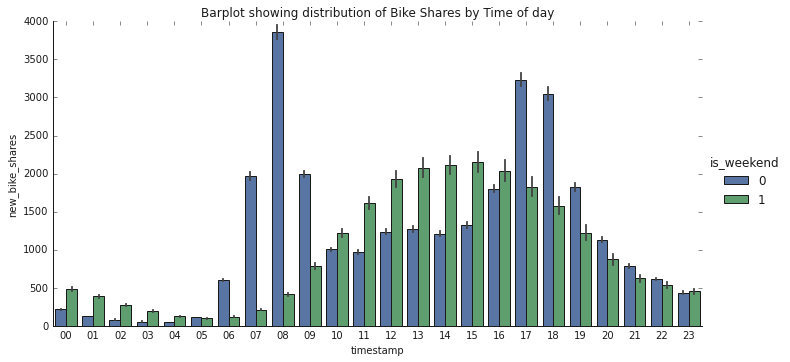

In [146]:
# add code here
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None
# Remove dates, minutes and seconds from 'timestamp' column to enable uncluttered 24hr plot
#create barplot showing average new_bike_shares every hour on both weekends and weekdays and show title

clean_df1['timestamp'] = pd.to_datetime(clean_df1['timestamp']).dt.strftime('%H')
share_distr_by_time = sns.catplot(data=clean_df1,x='timestamp',y='new_bike_shares',hue= 'is_weekend', kind='bar',height=5, aspect=2)
share_distr_by_time.set(title = 'Barplot showing distribution of Bike Shares by Time of day')

## Plot Interpretation

It is safe to conclude from this visual that during the weekdays the average number of bike shares peaks around 0800 in the morning and 1700 in the evening which coincides with the times majority of people go to work and return home.
However, on weekends, the average number of bike shares starts to increase gradually at 0700 and peaks at 1500

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

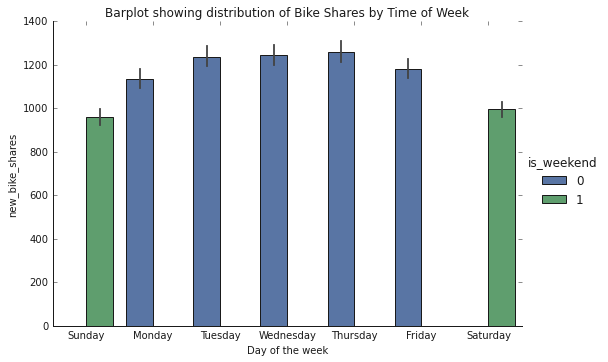

In [147]:
# add code here

#Create a column showing the day of the week based on each timestamp
#create barplot showing average new_bike_shares by time of the week and show title

clean_df2 = clean_df[clean_df['new_bike_shares'] >= 20]
clean_df2['Day of the week'] = pd.to_datetime(clean_df2['timestamp'],format='%d/%m/%Y %H:%M').dt.day_name()
share_distr_by_weekday = sns.catplot(data=clean_df2,x='Day of the week',y='new_bike_shares',hue= 'is_weekend', kind='bar',height=5, aspect=1.5)
share_distr_by_weekday.set(title = 'Barplot showing distribution of Bike Shares by Time of Week')

## Plot Interpretation

As indicated in the plot, the is higher demand during weekends, especially at the middle of the week, than during weekends

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

Correlation = 0.3677398669908882


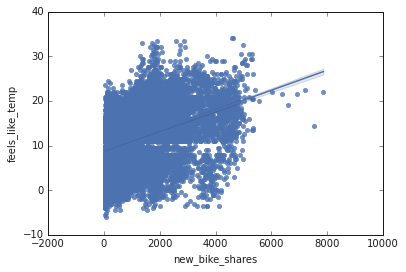

In [148]:
# add code here

# Create plot showing line of best fit between 'feels like temperature' and number of bike share
#Print value of correlation coefficient

sns.regplot(x=clean_df2["new_bike_shares"], y=clean_df2["feels_like_temp"])
print("Correlation =",clean_df2['new_bike_shares'].corr(clean_df2['feels_like_temp']))



## Plot Intepretation


As seen in the slope of the graph, the correlation is positive indicating that both values tend to increase together, however the relationship between them is not very strong

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [153]:
# add code here

from scipy.stats import ttest_ind

#determine the p-value
#check p-value against 95% confidence interval and either reject or accept null hypothesis
ttest,p_value = ttest_ind(clean_df2["new_bike_shares"],clean_df2["feels_like_temp"])
print(p_value)

if p_value <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

0.0
we reject null hypothesis


## Note

The Null hypothesis is that feels_like_temperature has no efect on new_bike_shares.

As shown from the p-value less than 5%, it is clear that the relationship between them is `statistically significant` and so we reject the null hypothesis that feels_like_temperature has no efect on new_bike_shares.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Programming Task 2


My approach to task 2 consists of the following steps/actions:
* I constantly checked documentations and references to determine the most applicable function to solve each problem
* I carefully study structure and content of the CSV file given in order to know how to extract needed parameters
* I check the contents of every dataframe or object before proceeding with the next line of code

In completing Tasks FR9 - FR14, I applied the following steps:

* Determine required library
* Determine most appropriate function
* Apply the function as recommended in documentation

Additional Steps For Tasks FR11 - FR14:

* Manipulate `datetime` column to reflect time of day only or days of the week only.

In completing the tasks, I learnt and used the following libraries:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scipy.stats - ttest_ind

I observed the following strengths to this approach:
It enabled me to read about other functions while searching for appropriate solutions to each step. I have gained even better understanding and appreciation of how python variables, data structures,flow control, etc works.

However, in taking this approach, I also observed some weaknesses:
I ended up spending a lot more time than advised and expected before I could finish the task. Having to look up python documentation each step of the way was time-consuming.

A possible alternative or addition to my approach would be to read carefully and fully understand all necessary information about the task, including the coursework assessment video, before proceeding. This saves time spent returning to make corrections or alterations to code already written. It would also be advisable to include code comments at the point of writing the code to improve efficiency.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>